In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
sys.path.insert(0, "../")
import guitarHarmony as gt
print(gt.__version__)
from itertools import product
import random

0.5.9


In [ ]:
import guitarHarmony as gt
a=gt.Note()
a.name, a.octave, a.nameWithOctave, a.duration
# a.show('notation')
a.show('midi')
a.show('')

In [ ]:
import guitarHarmony as gt
a=gt.Note('Fb5', 2.5)
a.name, a.octave, a.nameWithOctave, a.duration
# a.show('notation')
a.show('midi')
a.show('')

In [ ]:
import guitarHarmony as gt
for intv in gt.Interval.displayAllIntervals()[:3]:
    gt.Interval(intv).show('midi')
    gt.Interval(intv).show()

In [ ]:
import guitarHarmony as gt
root='C'
chord_type='7'
chord = gt.Chord(root, chord_type)
chord.chord_notes
for i in range(4):
    chord.getInversion(i).show('notation')

root = 'CDEFGAB'
for t in gt.Chord.displayAllChordsRecipe()[:3]:
    mute=gt.Chord('C', chord_type=t).buildArpeggio()

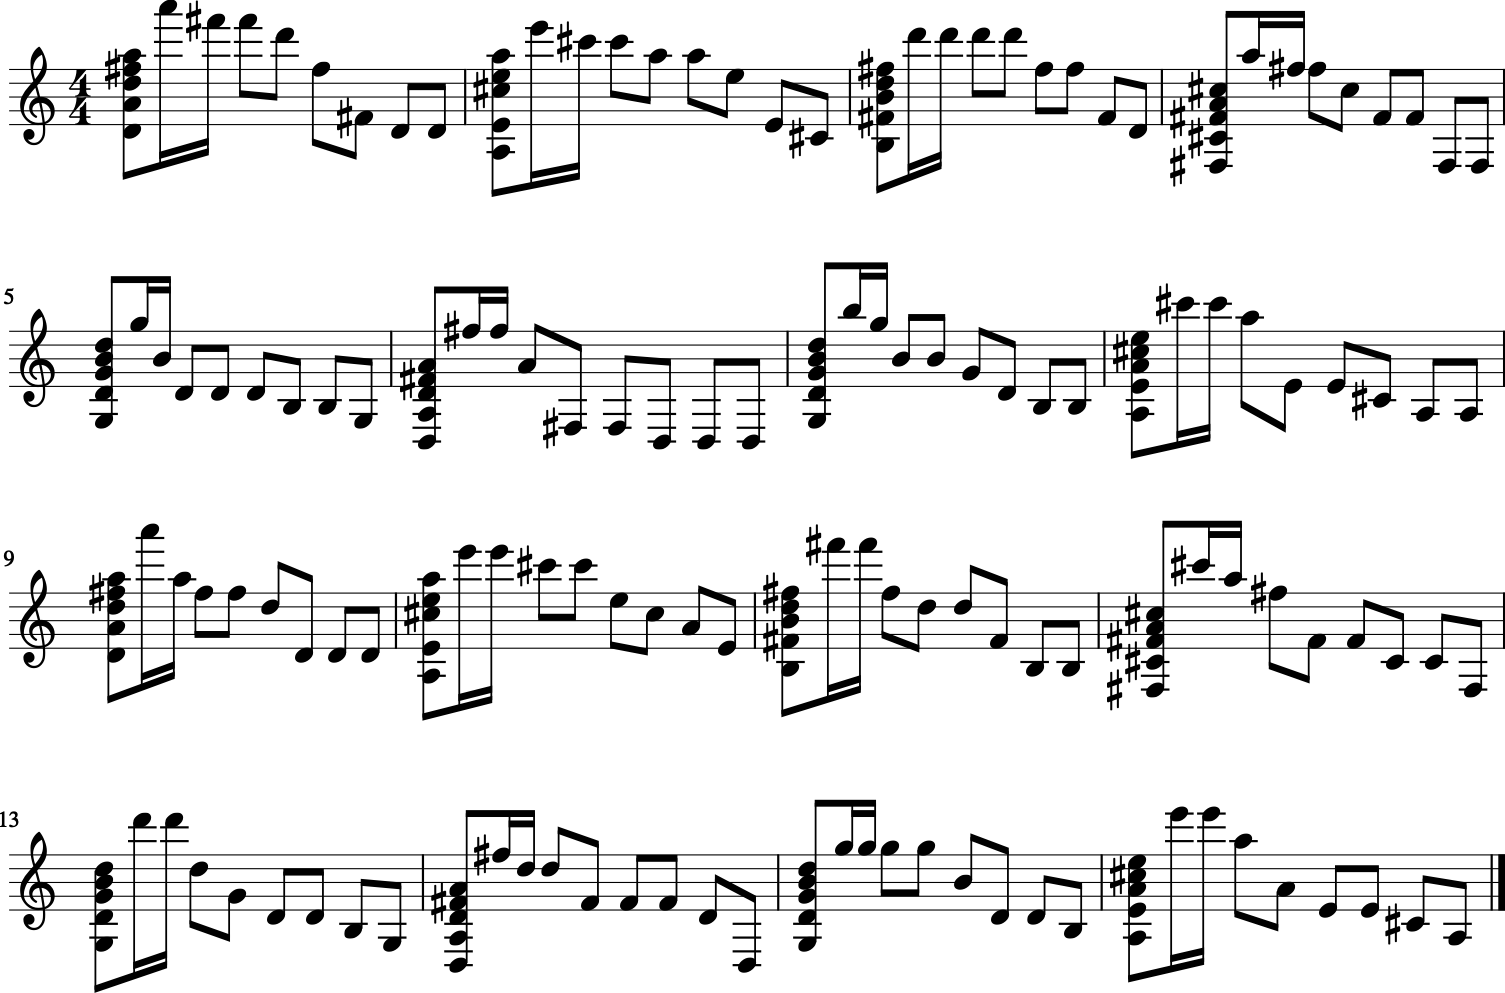

In [74]:
import guitarHarmony as gt
import random

elements  = []
# Hotel California
chord_set = ['B.m', 'F#.7', 'A.add9','E','G','D','E.m', 'F#.7']
inversion_set = '00010000'
bar_duration = [0.5,0.25,0.25,0.25,0.5,0.25,1.0,0.5,0.5]
octaves = [0, 1]

# Canon
chord_set = ['D5', 'A', 'B.m','F#.m','G','D','G', 'A']
inversion_set = '01000000'
bar_duration = [0.5,0.25,0.25,0.5,0.5,0.5,0.5,0.5,0.5]
octaves = [-1, 0, 1]

l = len(chord_set)
for idx in range(l*2):
    chord = gt.Chord.pharseChord(chord_set[idx%l], inversion=int(inversion_set[idx%l]), duration=bar_duration[0])
    ap = [random.choice(chord.chord_notes).setDuration(d).changeOctave(random.choice(octaves)) for d in bar_duration[1:]]
    ap = [note.setDuration(d) for note, d in zip(gt.Note.sortNotes(ap)[::-1], bar_duration[1:])]
    elements.append([chord.expandChord()] + ap)

s = gt.Stream([el for elset in elements for el in elset])
# s.show('notation')
s.show()
s.show('midi')

In [ ]:
import guitarHarmony as gt
chord = gt.Chord.pharseChord('C.7')
s = gt.Stream(chord.buildArpeggio(kind='down', unit=1/3)).show()
s = gt.Stream(chord.buildArpeggio(kind='Down', unit=1/3)).show()
s = gt.Stream(chord.buildArpeggio(kind='up', unit=1/3)).show()
s = gt.Stream(chord.buildArpeggio(kind='Up', unit=1/3)).show()
s = gt.Stream(chord.buildArpeggio(kind='valley', unit=1/3)).show()
# s = gt.Stream(chord.buildArpeggio(kind='Valley')).show()
s = gt.Stream(chord.buildArpeggio(kind='hill', unit=1/3)).show()
# s = gt.Stream(chord.buildArpeggio(kind='Hill')).show()

In [20]:
import guitarHarmony as gt
gt.Chord.matchChord(['Eb', 'C5', 'G'], verbose=True)

In [22]:
a = gt.Chord(root='E', chord_type='user', chord_notes=['E','G','C5'])
a.chord_recipe
gt.Chord.matchChord(a.chord_notes)

[Interval(Perfect,1st), Interval(Minor,3rd), Interval(Minor,6th)]

In [60]:
import guitarHarmony as gt
gt.Chord('A').expandChord().chord_notes
gt.Chord('A').expandChord().chord_recipe

[Note(A3), Note(E), Note(A), Note(C#5), Note(E5)]

[Interval(Perfect,1st),
 Interval(Perfect,5th),
 Interval(Perfect,8th),
 Interval(Minor,6th),
 Interval(Perfect,4th)]

In [59]:
import guitarHarmony as gt
type(gt.Note())
isinstance(gt.Note(), gt.Note)
isinstance(gt.Note(), gt.Chord)

guitarHarmony.note.Note

True

False

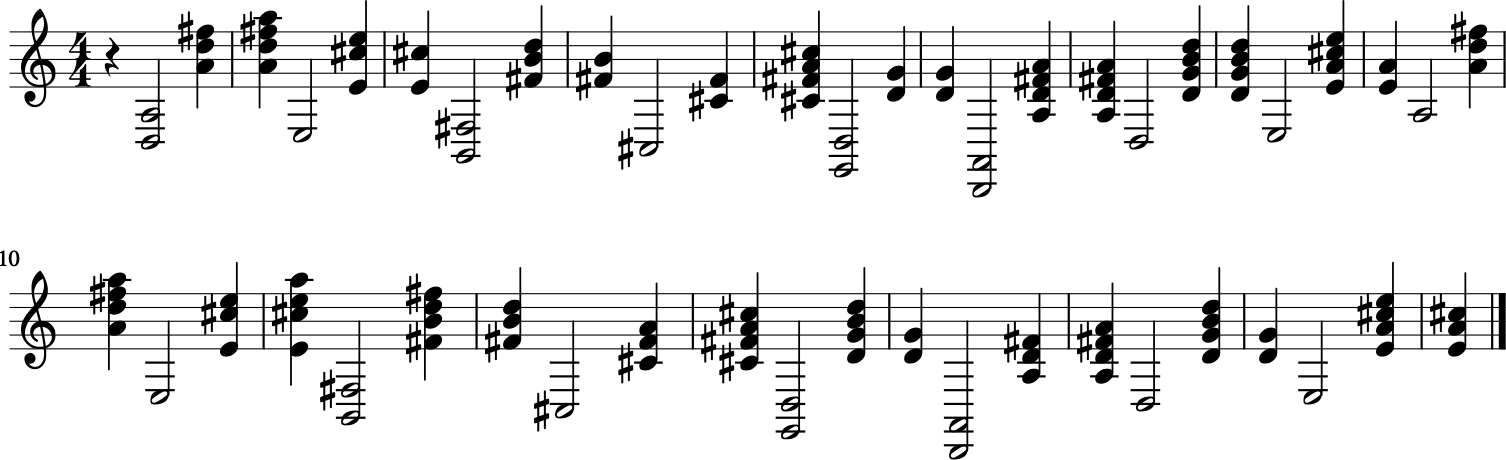

In [109]:
import guitarHarmony as gt
import random

elements  = []
# Hotel California
# chord_set = ['B.m', 'F#.7', 'A.add9','E','G','D','E.m', 'F#.7']
# inversion_set = '00010000'
# octaves = [-1, 0, 1]

# Canon
chord_set = ['D5', 'A', 'B.m','F#.m','G','D','G', 'A']
inversion_set = '01000000'
octaves = [-1, 0, 1]

l = len(chord_set)
chord_list = []
for idx in range(l*2):
    chord = gt.Chord.pharseChord(chord_set[idx%l], inversion=int(inversion_set[idx%l]), duration=2)
    chord_list.append(chord)

# # r = gt.Rhythm()
# r = gt.rhythm.SimpleRhythm('B.xSB.S.')
# # or try The following to mimic your previous rhythm
r = gt.rhythm.SimpleRhythm('B.xSxS.SB.x.S.S.') #This is similar to your bar_duration of Hotel California
r = gt.rhythm.SimpleRhythm('B.xSS.xSB.x.S.S.') #This is similar to your bar_duration of Cannon
r = gt.rhythm.SimpleRhythm('B.SS') #This is similar to your bar_duration of Cannon
s = r.apply_gtChordList(chord_list, expandChord_times=2)
s.show()
s.show('midi')